# Solving ODEs with SciPy

Now that we've learnt the basics of ODE solving we can look at using libraries. These libraries allow us to easy use methods that use adapative step size, explicit or implicit methods, and have been checked to work by many developers and tens of thousands of users.

We will look at the Python library SciPy, and imparticular the `solve_ivp` function for solving initial value problems. You can find the documentation for this function at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## A simple first-order example

Consider the ODE $y'(x) = -\frac{1}{2} y(x)$ with $y(0) = 10$. First write a function for the derivative:

In [2]:
def exponential_decay(t, y): 
    return -0.5 * y

`solve_ivp` only needs three arguments (1) the function, (2) the range of the independent variable, and (3) an array with the initial values:

In [3]:
sol = solve_ivp(exponential_decay, [0, 10], [10])

Explicitly print out the solutions:

In [4]:
print(sol.t)
print(sol.y)

[ 0.          0.11487213  1.26359346  3.06049939  4.85740531  6.65431124
  8.45121717 10.        ]
[[10.          9.44182253  5.31648754  2.16609348  0.88253023  0.35956879
   0.14649891  0.06754689]]


Notice that the steps are not evenly spaced as the default function for the `solve_ivp` is an adaptive forth-order Runge-Kutta algorithm (RK4). Printing the the solution provides futher information, such as `nfev` the number of function evaluations:

In [19]:
print(sol)
print(sol.nfev)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11487213,  1.26359346,  3.06049939,  4.85740531,
        6.65431124,  8.45121717, 10.        ])
 t_events: None
        y: array([[10.        ,  9.44182253,  5.31648754,  2.16609348,  0.88253023,
         0.35956879,  0.14649891,  0.06754689]])
44


Plot the steps and the analytic solution. 

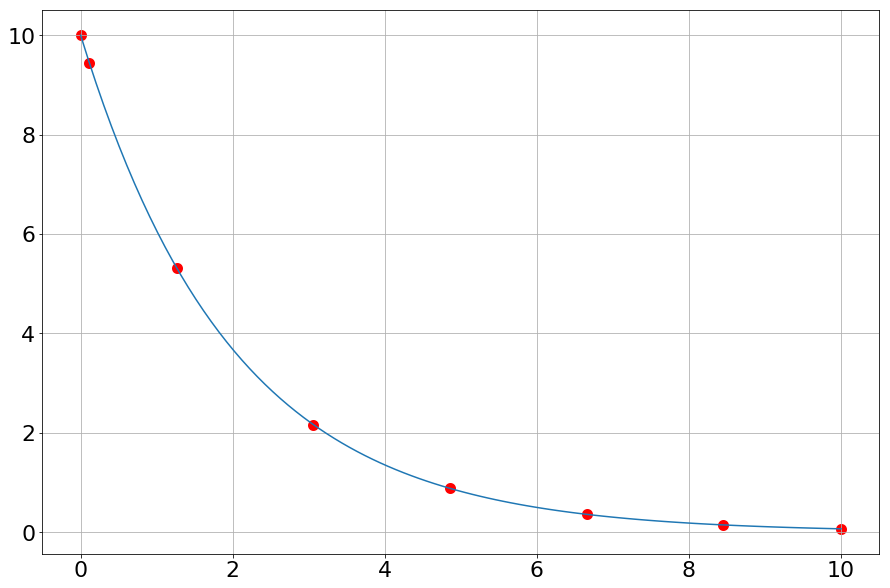

In [20]:
t = np.linspace(0,10,100)
y = 10*np.exp(-0.5*t)

plt.grid(True)
plt.scatter(sol.t, sol.y[0], color='red', linewidth=5);
plt.plot(t, y);

## Second-order ODE example

Let's look at the second-order ODE: $y''(x) = -y(x)$ with $y[0] = 1, y'[0] = 0$. First we have to write this in first-order form:

$$\begin{align}
    y_0'(x) &= y_1\\
    y_1'(x) &= -y_0
\end{align}$$

Now we define a function for this:

In [21]:
def oscilation(t, y):
    return [y[1], -y[0]]

Now let's solve the ODE. Notie we have to pass the two initial conditions. The code will internally use an adapative RK4 method, but let's output the results on a fixed grid by passing the `t_eval` option as a list of values.

In [22]:
solOsc = solve_ivp(oscilation, [0, 10], [1,0], t_eval = np.linspace(0,10,50))

Plot the steps against the analytic solution

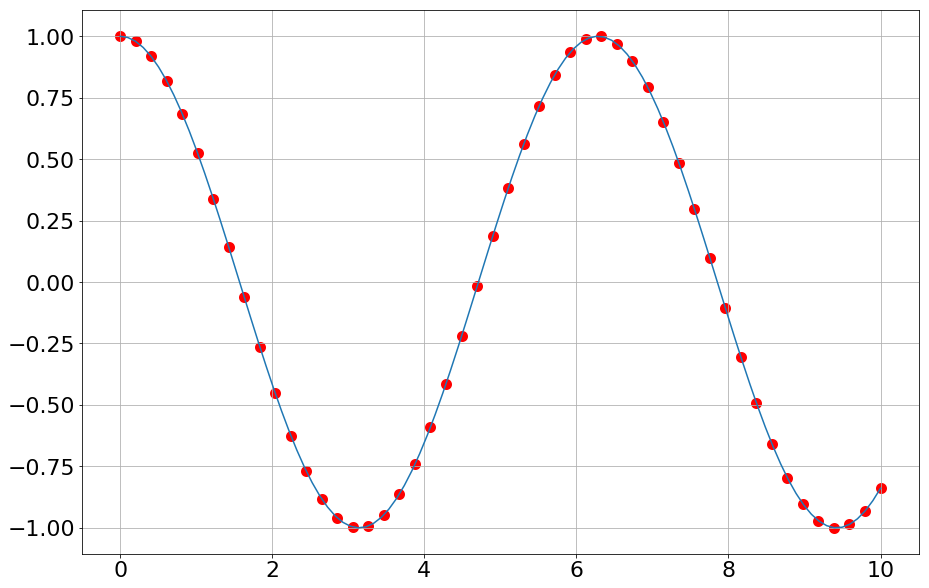

In [23]:
tOsc = np.linspace(0,10,100)
yOsc = np.cos(tOsc)

plt.grid(True)
plt.scatter(solOsc.t, solOsc.y[0], color='red', linewidth=5);
plt.plot(tOsc, yOsc);

# Stiff ODE example

In [24]:
lam = 300

def dydxStiff(x,y):
    global lam
    return lam*(-y + np.sin(x))

def yStiff(x):
    global lam
    C = lam/(1+lam**2)
    return C*np.exp(-lam*x) + (lam**2*np.sin(x) -lam*np.cos(x))/(1+lam**2)

The implicit methods often want/need the Jacobian matrix. This is an $n\times n$ matrix where the elements $a_{ij} = df_i/dy_j$

In [25]:
def jacobian(x, y):
    global lam
    return [[-lam]]

In [26]:
solStiffRK4      = solve_ivp(dydxStiff, [0, 2], [0], method='RK45')
solStiffImplicit = solve_ivp(dydxStiff, [0, 2], [0], method='BDF', jac=jacobian)

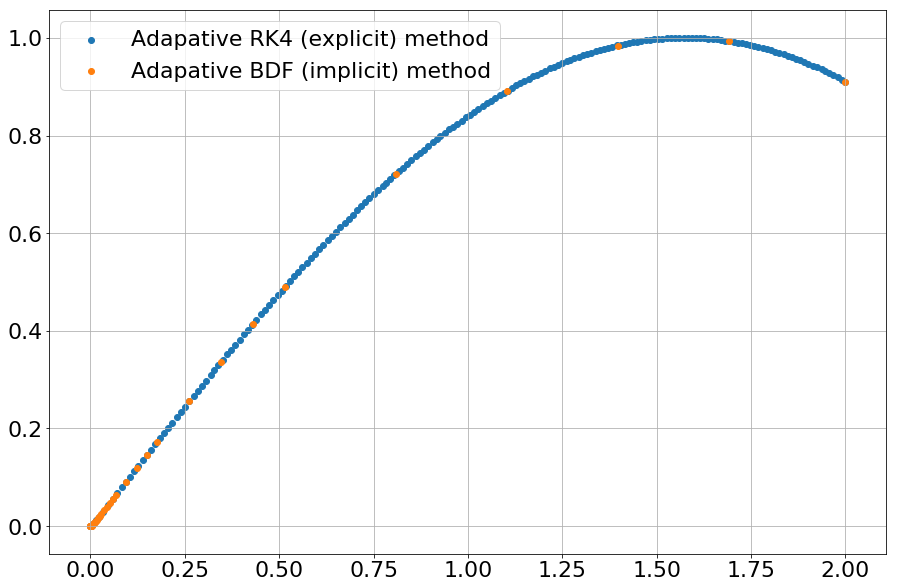

In [32]:
plt.grid(True)
plt.scatter(solStiffRK4.t, solStiffRK4.y[0]);
plt.scatter(solStiffImplicit.t, solStiffImplicit.y[0]);
plt.legend(['Adapative RK4 (explicit) method', 'Adapative BDF (implicit) method']);

We see that the adaptive integrator forces the RK4 method to take many tiny steps, whereas the implicit `BDF` method can take much larger steps. Try playing with $\lambda$ above. The larger you make it the stiffer the ODE becomes and the more steps the adaptive RK4 method has to take in order to maintain accuracy. The implicit method though takes roughly the same number of steps regardless of the value of $\lambda$.

In [31]:
print("Number of steps RK4 took: %d" % solStiffRK4.nfev)
print("Number of steps BDF took: %d" % solStiffImplicit.nfev)

Number of steps RK4 took: 1382
Number of steps BDF took: 86
